In [1]:
from typing import List, Dict
import scipy as sp
from scipy.stats import wilcoxon, mannwhitneyu


from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [2]:
filesuffixes = [
    # '_for_experiment_not_screened_cols_top_50_features_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_screened_cols_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'
    ]

In [35]:
full_datasets: Dict[str, pd.DataFrame] = {}
per_thereshold_metrics: Dict[str, pd.DataFrame] = {}

In [4]:
cv_analytics_utils = commonized_datasets(filesuffixes)

_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_screened_cols_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Number of records: 150948
_for_experiment_screened_cols_single_first_5_RandomFore

_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0.0001, 0.023333333333333334, 0.1526666666666667, 0.2853333333333333, 0.501333333333334, 1]
Threshold: 0.023333333333333334


Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.999835  | 0.000177764 | 0.999382   | 1         |
| recall__class_0    | 0.964368  | 0.00263126  | 0.958707   | 0.967281  |
| f1-score__class_0  | 0.981779  | 0.00135778  | 0.978869   | 0.983319  |
| precision__class_1 | 0.0161127 | 0.00502084  | 0.00589971 | 0.0232558 |
| recall__class_1    | 0.784524  | 0.229921    | 0.25       | 1         |
| f1-score__class_1  | 0.0315721 | 0.00981846  | 0.0115274  | 0.0454545 |
| accuracy           | 0.964235  | 0.00261482  | 0.958641   | 0.96720

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


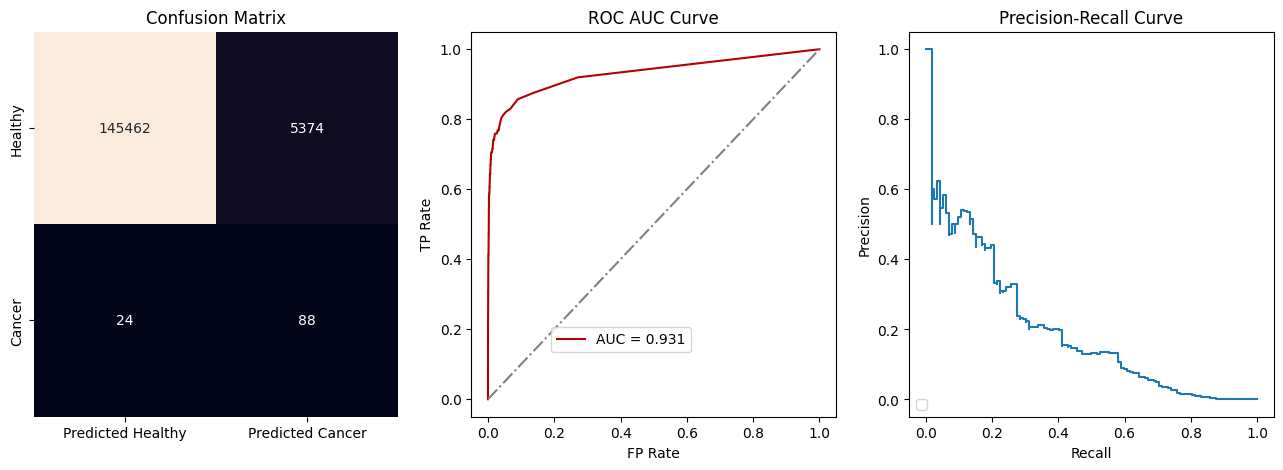

_for_experiment_screened_cols_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0.0001, 0.006666666666666667, 0.20333333333333342, 0.45133333333333325, 0.8320000000000001, 1]
Threshold: 0.006666666666666667


Cross-Validation measures:
+--------------------+------------+-------------+------------+-----------+
|                    |       mean |         std |        min |       max |
|--------------------+------------+-------------+------------+-----------|
| precision__class_0 | 0.999832   | 0.000172033 | 0.999371   | 1         |
| recall__class_0    | 0.942385   | 0.00318521  | 0.937387   | 0.949696  |
| f1-score__class_0  | 0.970256   | 0.00165147  | 0.967682   | 0.973901  |
| precision__class_1 | 0.00998127 | 0.00280468  | 0.00394477 | 0.0125    |
| recall__class_1    | 0.785714   | 0.217346    | 0.25       | 1         |
| f1-score__class_1  | 0.0197105  | 0.00553531  | 0.00776699 | 0.0246914 |
| accuracy           | 0.942269   | 0.00311094  | 0.937431   | 0.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


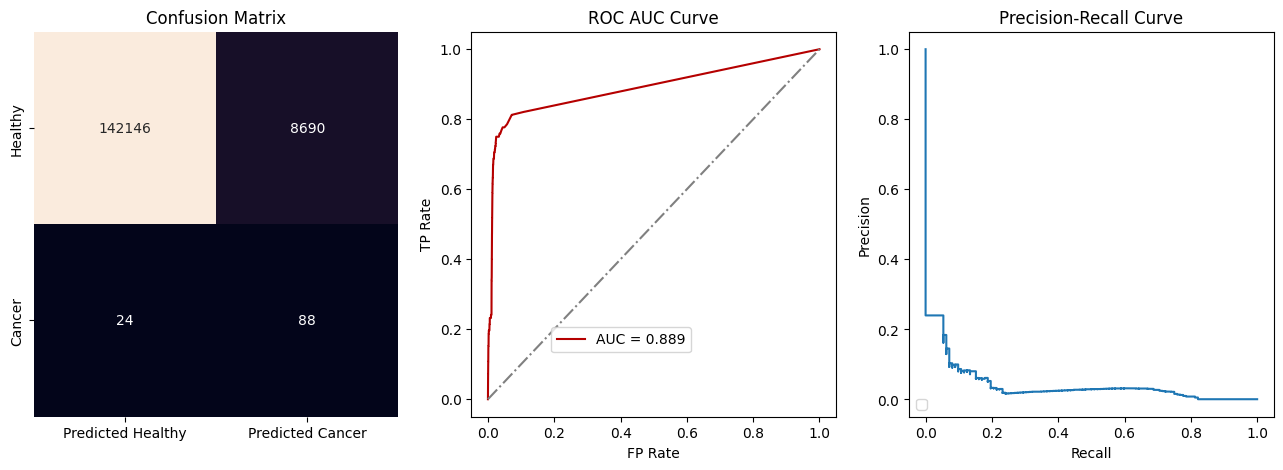

_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0.0001, 0.016666666666666666, 0.168, 0.3306666666666666, 0.5980000000000001, 1]
Threshold: 0.016666666666666666


Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.999834  | 0.000140935 | 0.999578   | 1         |
| recall__class_0    | 0.958489  | 0.00298536  | 0.951778   | 0.962745  |
| f1-score__class_0  | 0.978723  | 0.00156196  | 0.975093   | 0.98082   |
| precision__class_1 | 0.0139142 | 0.00357853  | 0.00621118 | 0.0179487 |
| recall__class_1    | 0.783333  | 0.188363    | 0.428571   | 1         |
| f1-score__class_1  | 0.0273388 | 0.0070174   | 0.0122449  | 0.0351759 |
| accuracy           | 0.958361  | 0.00299196  | 0.951411   | 0.9

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


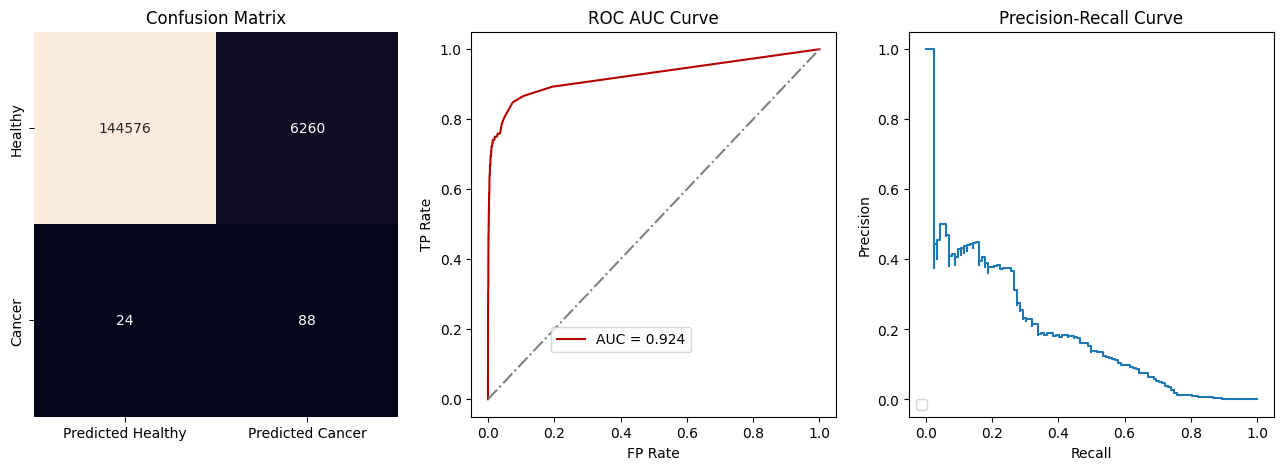

_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials
[-0.0001, 0.006008885148912668, 0.06860657036304474, 0.4931847393512725, 0.9384048581123352, 1]
Threshold: 0.006008885148912668


Cross-Validation measures:
+--------------------+-----------+-------------+------------+-----------+
|                    |      mean |         std |        min |       max |
|--------------------+-----------+-------------+------------+-----------|
| precision__class_0 | 0.999839  | 0.000111191 | 0.999679   | 1         |
| recall__class_0    | 0.944414  | 0.0111789   | 0.926203   | 0.962863  |
| f1-score__class_0  | 0.971305  | 0.00590115  | 0.961588   | 0.98103   |
| precision__class_1 | 0.0108142 | 0.00296325  | 0.00656814 | 0.0184697 |
| recall__class_1    | 0.791667  | 0.150719    | 0.571429   | 1         |
| f1-score__class_1  | 0.0213234 | 0.00578506  | 0.012987   | 0.0361757 |
| accuracy           | 0.944303  | 0.0111449   | 0.926055   | 0.962793  |
| 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


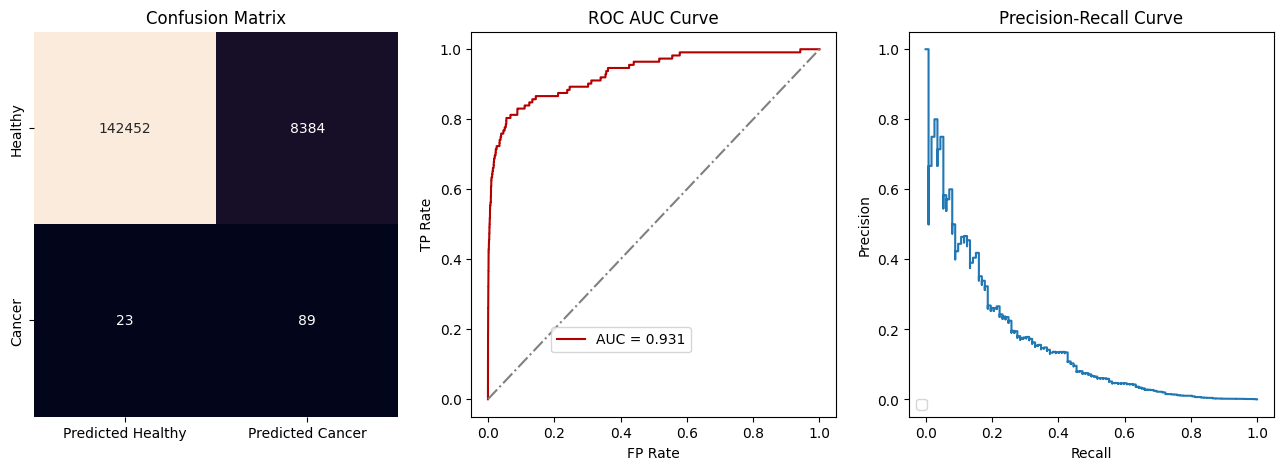

_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0.0001, 0.0033333333333333335, 0.01, 0.16266666666666652, 0.3426666666666669, 1]
Threshold: 0.0033333333333333335


Cross-Validation measures:
+--------------------+------------+-------------+-------------+------------+
|                    |       mean |         std |         min |        max |
|--------------------+------------+-------------+-------------+------------|
| precision__class_0 | 0.999715   | 0.000197689 | 0.999211    | 1          |
| recall__class_0    | 0.739928   | 0.0112105   | 0.72327     | 0.762293   |
| f1-score__class_0  | 0.850379   | 0.00733807  | 0.839367    | 0.86492    |
| precision__class_1 | 0.00201855 | 0.000512864 | 0.000819672 | 0.00263356 |
| recall__class_1    | 0.715476   | 0.195437    | 0.25        | 1          |
| f1-score__class_1  | 0.00402571 | 0.00102298  | 0.00163399  | 0.00525131 |
| accuracy           | 0.739909   | 0.0110941 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


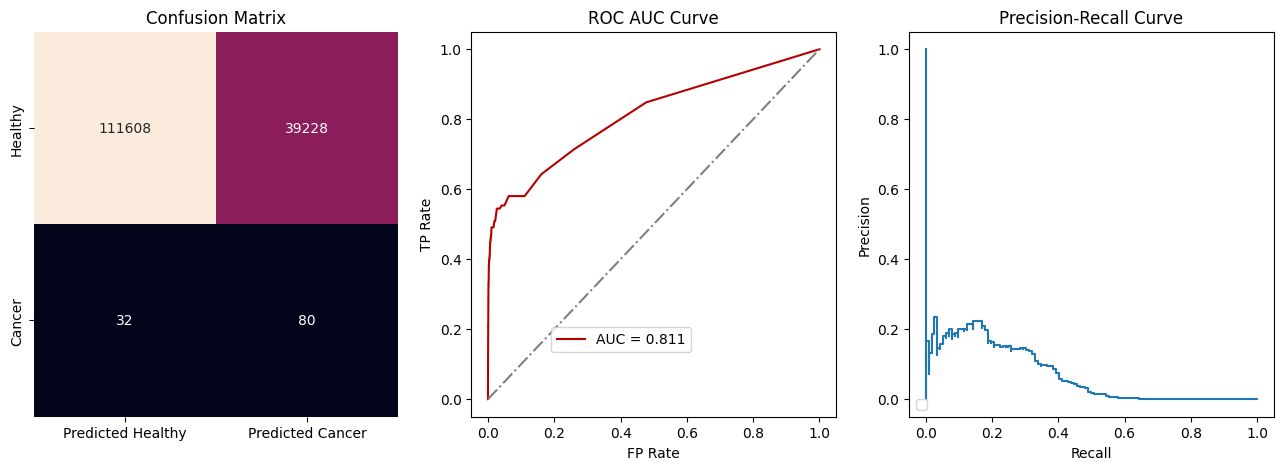

_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0.0001, 0.010666666666666677, 0.05, 0.14666666666666667, 0.30666666666666664, 1]
Threshold: 0.010666666666666677


Cross-Validation measures:
+--------------------+------------+-------------+------------+------------+
|                    |       mean |         std |        min |        max |
|--------------------+------------+-------------+------------+------------|
| precision__class_0 | 0.999833   | 0.000129513 | 0.999565   | 1          |
| recall__class_0    | 0.914889   | 0.00511615  | 0.907084   | 0.920934   |
| f1-score__class_0  | 0.95547    | 0.00279317  | 0.951218   | 0.95879    |
| precision__class_1 | 0.00690291 | 0.00153041  | 0.00438596 | 0.00876095 |
| recall__class_1    | 0.794048   | 0.161825    | 0.5        | 1          |
| f1-score__class_1  | 0.0136859  | 0.00302942  | 0.00870511 | 0.0173482  |
| accuracy           | 0.9148     | 0.00511192  | 0.9070

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


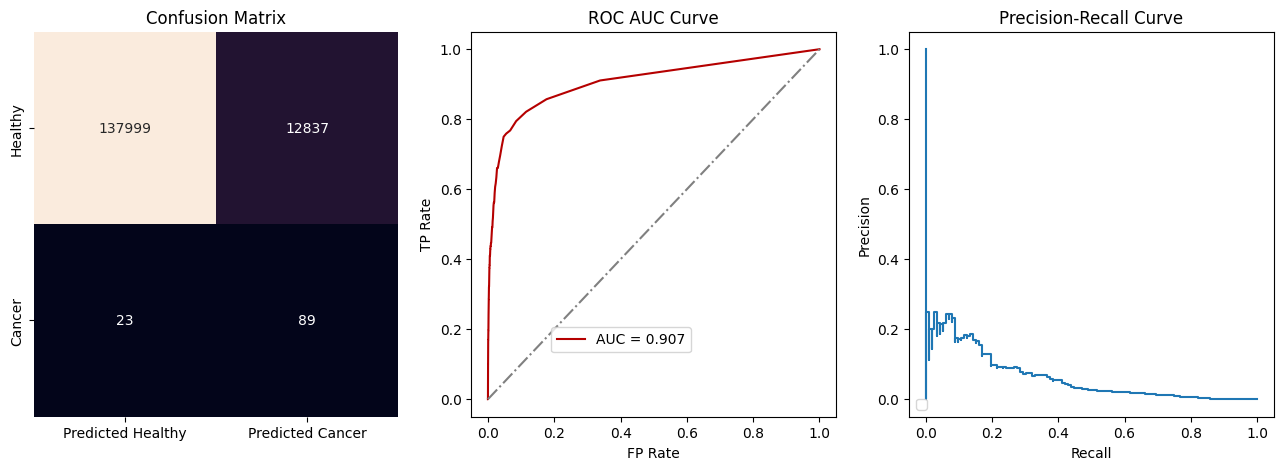

In [36]:
for filesuffix, cv_analytics_util in cv_analytics_utils.items():
    print(filesuffix)
    label = cv_analytics_util.get_label()
    classifier_name = cv_analytics_util.get_classifier_type()
    based_on = 'questionaire'
    if 'screened' in filesuffix:
        based_on += ' + screening'
    # Plot
    # Predicting actual cancer probability using bucketing
    per_thereshold_metric = bucket_predictions_by_thresholds(cv_analytics_util)

    # General Plots
    # threshold = cv_analytics_util.get_optimal_operating_point()
    threshold = per_thereshold_metric.loc[1, 'Threshold']
    print(f"Threshold: {threshold}")
    cv_analytics_util.update_thresholds(threshold)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
    # End Plot
    full_datasets[filesuffix] = cv_analytics_util.get_dataset_with_predictions()
    per_thereshold_metrics[filesuffix] = per_thereshold_metric
    # full_dataset_cancer = extract_full_dataset_filter_cancer(full_dataset)
    # full_dataset_no_cancer = extract_full_dataset_filter_no_cancer(full_dataset)

    title_caner = f'Change in probability of getting cancer for those who develop it based on {based_on} using {classifier_name} classifier'
    title_no_caner = f'Change in probability of getting cancer for those who don\'t develop it based on {based_on} using {classifier_name} classifier'

In [6]:
def calc_U(y_true, y_score):
    n1 = np.sum(y_true==1)
    n0 = len(y_score)-n1
    
    ## Calculate the rank for each observation
    # Get the order: The index of the score at each rank from 0 to n
    order = np.argsort(y_score)
    # Get the rank: The rank of each score at the indices from 0 to n
    rank = np.argsort(order)
    # Python starts at 0, but statistical ranks at 1, so add 1 to every rank
    rank += 1
    
    # If the rank for target observations is higher than expected for a random model,
    # then a possible reason could be that our model ranks target observations higher
    U1 = np.sum(rank[y_true == 1]) - n1*(n1+1)/2
    U0 = np.sum(rank[y_true == 0]) - n0*(n0+1)/2
    
    # Formula for the relation between AUC and the U statistic
    AUC1 = U1/ (n1*n0)
    AUC0 = U0/ (n1*n0)
    
    return U1, AUC1, U0, AUC0

In [7]:
full_dataset1 = full_datasets['_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'].copy()
full_dataset2 = full_datasets['_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'].copy()

In [8]:
full_dataset1 = full_datasets['_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'].copy()
full_dataset2 = full_datasets['_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials'].copy()

In [41]:
full_dataset1 = full_datasets['_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'].copy()
full_dataset2 = full_datasets['_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials'].copy()

In [10]:
per_thereshold_metric1 = per_thereshold_metrics['_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials'].copy()
per_thereshold_metric2 = per_thereshold_metrics['_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials'].copy()

In [42]:
distr1 = full_dataset1.apply(lambda row: map_label_prob_to_bucket(per_thereshold_metric1, row, label), axis=1).to_numpy()
distr2 = full_dataset2.apply(lambda row: map_label_prob_to_bucket(per_thereshold_metric2, row, label), axis=1).to_numpy()

In [12]:
# full_dataset1 = full_dataset1[full_dataset1[f'{label}_prob'] > 0.01]
# full_dataset2 = full_dataset2[full_dataset2[f'{label}_prob'] > 0.01]

In [46]:
distr1 = full_dataset1[f'{label}_prob'].to_numpy()
distr2 = full_dataset2[f'{label}_prob'].to_numpy()

In [47]:

y_true1 = full_dataset1[label].to_numpy()
y_true2 = full_dataset2[label].to_numpy()
scipy_U = mannwhitneyu(distr1, distr2, alternative='two-sided', use_continuity=False)
print(scipy_U.statistic)
print(scipy_U.pvalue)

12234688385.5
0.0


In [15]:
distr1.shape

(150948,)

In [45]:
distr2.shape

(150948,)

In [17]:
y_true1.shape

(150948,)

In [18]:
def calculate_se(predicted_probabilities, true_values):
    squared_errors = [(predicted_probability - true_value)**2 for predicted_probability, true_value in zip(predicted_probabilities, true_values)]
    return squared_errors


In [27]:
scipy_U = mannwhitneyu(calculate_se(distr1, y_true1), calculate_se(distr2, y_true2), alternative='two-sided', use_continuity=False)
print(scipy_U.statistic)
print(scipy_U.pvalue)

824271661.0
0.0


In [28]:
y_true1 = y_true1.astype(int)
stat, p = mannwhitneyu(distr1[y_true1==1], distr1[y_true1==0], alternative='two-sided', use_continuity=False)
print(p)

0.0


In [29]:
stat, p = wilcoxon(calculate_se(distr1, y_true1), calculate_se(distr2, y_true2), zero_method='zsplit')
print(p)

0.0


In [44]:
import numpy as np
from mlxtend.evaluate import mcnemar_table, mcnemar

pred1 = full_dataset1[f'{label}_pred'].to_numpy().astype(int)
pred2 = full_dataset2[f'{label}_pred'].to_numpy().astype(int)

# Calculate p value
tb = mcnemar_table(y_target=y_true1, 
                   y_model1=pred1, 
                   y_model2=pred2)
chi2, p = mcnemar(ary=tb, exact=False)

print('chi-squared:', chi2)
print('p-value:', p)
print(f'table: {tb}')

chi-squared: 219.760101010101
p-value: 1.0202622190198248e-49
table: [[143325   2225]
 [  1339   4059]]


In [23]:
import numpy as np
from scipy.stats import chi2_contingency

# Assuming you have two arrays with predicted probabilities and true values for classifiers A and B
# For example, let's call these arrays prob_A, prob_B, true_values_A, true_values_B

# Create a "supermodel" by combining the predicted probabilities
supermodel_prob = np.vstack((distr1, distr2)).T

# Calculate the contingency table
contingency_table = np.histogram2d(y_true1, y_true2, bins=[2, 2])[0]

# Perform the likelihood-ratio chi-squared test
chi2, p_value, _, _ = chi2_contingency(contingency_table, correction=False)

print(f'chi-squared value: {chi2}')
print(f'p-value: {p_value}')
# Determine if one classifier is better than the other
if p_value < 0.05:
    if chi2 > 0:
        print("Method A is better than Method B")
    else:
        print("Method B is better than Method A")
else:
    print("There is no significant difference between Method A and Method B")


chi-squared value: 150948.0
p-value: 0.0
Method A is better than Method B
